# Pie Charts

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

pd.options.mode.use_inf_as_na = False
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#Downloaded data into dataframe

df_canada = pd.read_excel('Canada.xlsx', sheet_name = 'Canada by Citizenship', skiprows = range(20), skipfooter = 2)

In [4]:
df_canada.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [5]:
df_canada.shape

(195, 43)

In [6]:
df_canada.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [7]:
#Dropping the unwanted columns from df

df_canada.drop(['AREA','Coverage', 'Type', 'DEV', 'REG'],axis=1, inplace=True)
df_canada.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


In [8]:
#Replacing the columns-name with the names suited for reporting or visulaization

df_canada.rename(columns={'OdName':'Country', 'AreaName': 'Continent', 'RegName':'Region'},inplace = True) # inplace = true , changes the value within the data frame
df_canada.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [9]:
#Validate the values whether it is string in the dataframe

all(isinstance(column, str) for column in df_canada.columns)

False

In [10]:
# Converting the columns which are not strings 

df_canada.columns = list(map(str,df_canada.columns))
df_canada.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

In [11]:
#setting the index as country

df_canada.set_index('Country', inplace = True)
df_canada.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [12]:
#Added the columns as Totals

df_canada['Total'] = df_canada.sum(axis=1)
df_canada.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [13]:
#Years converted to string

years = list(map(str, range (1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Pie chart are circular diagrams which will have proportion of circle, which are divided based on slicing of data. We can achieve by using on slicing of data. kind 'pie' in the plot function


we can quickly check the percentage of contribution to the whole (i.e. 100% ) from each continent for the entire period in the dataset ( 1980- 2013)

we can achieve this in three steps, namely split, apply aggregation and combine

* split : Split the dataset into groups based on some criteria (in our case Continent)

* apply aggregation : apply aggregation (this aggregation will be applied to each group)

* combine:  Combining the results into a Data structure

In [14]:
#Group by Continent and apply sum Function

df_continents = df_canada.groupby('Continent', axis=0 ).sum()
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


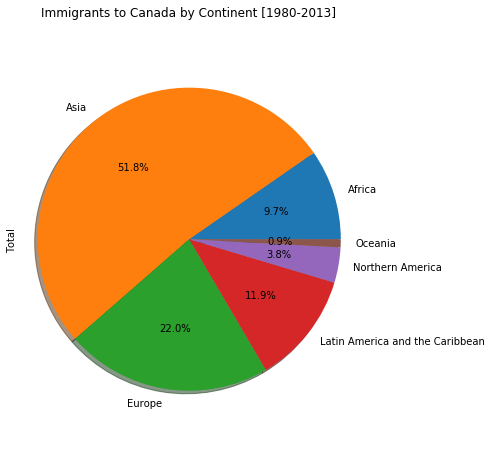

In [15]:
#plotting the pie chart
df_continents['Total'].plot(kind='pie', 
                            figsize=(6,8), 
                            autopct = '%1.1f%%', 
                            startangle=0, shadow = True)

plt.title('Immigrants to Canada by Continent [1980-2013]')
plt.axis('equal')   # Help the pie-chart to look like a circle

plt.show()

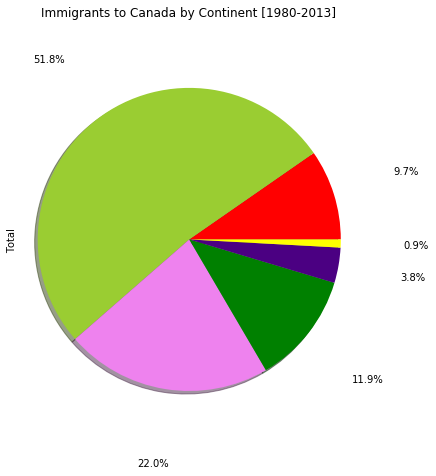

In [16]:
colors_list = ['red','yellowgreen','violet', 'green', 'indigo', 'yellow', 'orange']
#explode_list = [0.1]


df_continents['Total'].plot(kind='pie', 
                            figsize=(6,8), 
                            autopct = '%1.1f%%', 
                            startangle=0, 
                            shadow = True,
                            labels = None,
                            pctdistance = 1.5,
                            colors = colors_list)

plt.title('Immigrants to Canada by Continent [1980-2013]')
plt.axis('equal')   # Help the pie-chart to look like a circle

plt.show()

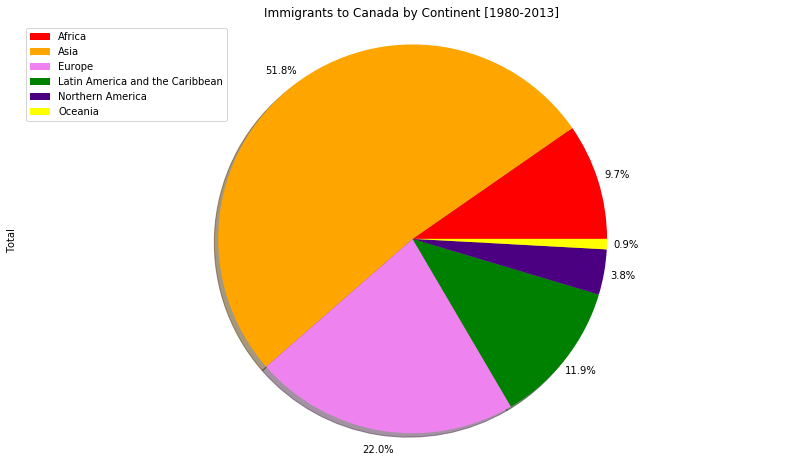

In [17]:
colors_list = ['red', 'orange','violet', 'green', 'indigo', 'yellow','yellowgreen']

df_continents['Total'].plot(kind='pie', 
                            figsize=(14,8), 
                            autopct = '%1.1f%%', 
                            startangle=0, 
                            shadow = True,
                            labels = None,
                            pctdistance=  1.1,
                           colors= colors_list)

plt.title('Immigrants to Canada by Continent [1980-2013]')
plt.axis('equal') # Help the pie-chart to look like a circle

plt.legend(labels=df_continents.index, loc ='upper left')
plt.show()

# Box plots

#### Box plots are used to statistically represents the distribution of the data through 5 dimensions:

* Minimum: Smallest number in the dataset
* First Quartile: Middle Number between the minimum and median
* Second Quartile: Middle Number of the sorted dataset
* Third Quartile: Middle Number between the median and maximum
* Maximum Highest: numbers in the datset

In [18]:
df_japan = df_canada.loc[['Japan'], years].T
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


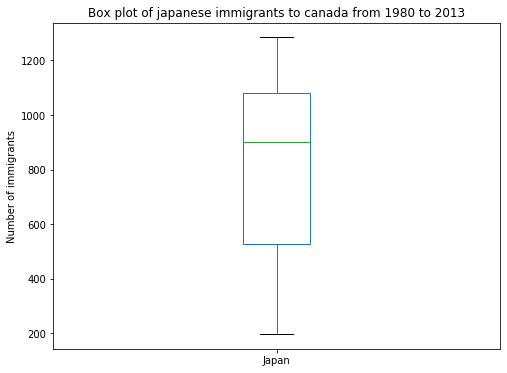

In [20]:
df_japan.plot(kind ='box', figsize = (8,6))

plt.title('Box plot of japanese immigrants to canada from 1980 to 2013')
plt.ylabel('Number of immigrants')

plt.show()

#### Observation

* Minimum number of immigrants is around 200 and maximum are around 1300

* 25% years for period 1980-2013 had annual immigrants count for around 500.

* Median of years have the annual immigrants around 900

* 75% of years have annual immigrants around 1100 ( third quartile)

In [21]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


### Take home 2 : Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

In [27]:
df_indochina = df_canada.loc[['India','China'], years]
df_indochina.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


In [28]:
df_indochina = df_canada.loc[['India','China'], years].T
df_indochina.head(5)

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


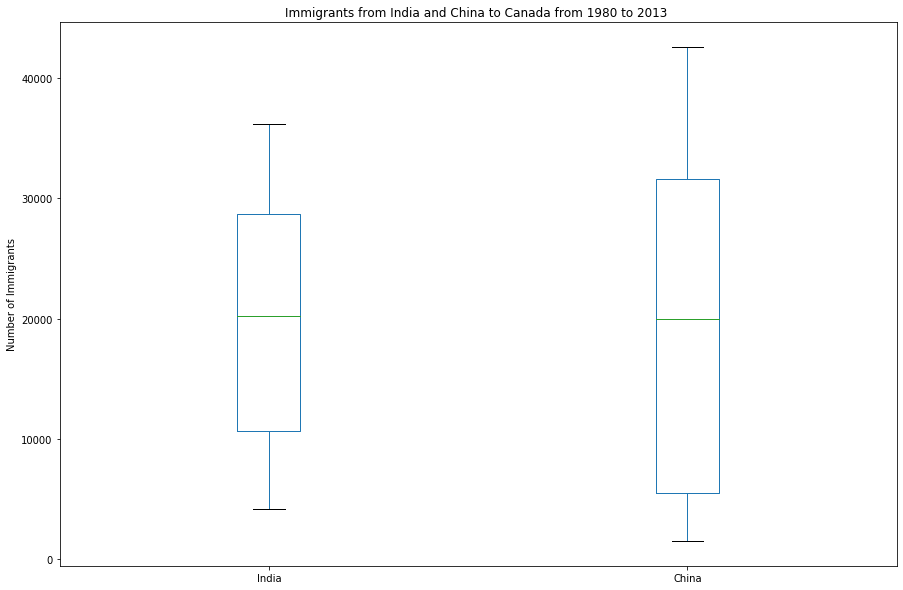

In [37]:
df_indochina.plot(kind = 'box', figsize = (15,10))

plt.title('Immigrants from India and China to Canada from 1980 to 2013 ')
plt.ylabel('Number of Immigrants')

plt.show()


In [39]:
df_indochina.describe()

Country,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000
